### Check that fields from CPL hist file match those from MOM6

### bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.003 (v5)
This is a restart 2 day run using out-of-the-box BMOM with the following modifications:

* ROF_NCPL=48; OCN_NCPL=48; GLC_NCPL=48
* budget_daily = 1; budget_inst = 1, in user_nl_cpl
* Using /glade/scratch/mvertens/nuopc.runseq.for_gustavo

Saving MOM6 daily/hourly mean/snapshot forcing variables to compare against the CPL heat budget table and hostory files. Heat budget analysis done over one hour. 


### Run sequecing 

```
runSeq::
@172800
@1800
  MED med_phases_aofluxes_run
  MED med_phases_prep_ocn_accum
  MED med_phases_ocnalb_run
  MED med_phases_prep_lnd
  MED -> LND :remapMethod=redist
  MED med_phases_prep_ice
  MED -> ICE :remapMethod=redist
  MED med_phases_prep_rof
  MED -> ROF :remapMethod=redist
  MED med_phases_prep_ocn_avg
  MED -> OCN :remapMethod=redist
  ICE
  LND
  ROF
  OCN
  OCN -> MED :remapMethod=redist
  MED med_phases_post_ocn
  MED med_phases_diag_ocn
  LND -> MED :remapMethod=redist
  MED med_phases_post_lnd
  MED med_phases_diag_lnd
  MED med_phases_diag_rof
  MED med_phases_diag_ice_ice2med
  MED med_phases_diag_glc
  ICE -> MED :remapMethod=redist
  MED med_phases_post_ice
  MED med_phases_prep_atm
  MED -> ATM :remapMethod=redist
  ATM
  ATM -> MED :remapMethod=redist
  MED med_phases_post_atm
  MED med_phases_diag_atm
  MED med_phases_diag_ice_med2ice
  ROF -> MED :remapMethod=redist
  MED med_phases_post_rof
  MED med_phases_diag_accum
  MED med_phases_diag_print
  MED med_phases_history_write
  MED med_phases_restart_write
  MED med_phases_profile
@
  GLC -> MED :remapMethod=redist
@
```


In [1]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6plot import xyplot

Basemap module not found. Some regional plots may not function properly


In [2]:
path= '/glade/scratch/gmarques/bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.003/run/'
grd = MOM6grid(path+'bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.003.mom6.static.nc')
area = np.ma.masked_where(grd.wet==0,grd.area_t)
grd_xr = MOM6grid(path+'bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.003.mom6.static.nc', xrformat=True)

MOM6 grid successfully loaded... 

MOM6 grid successfully loaded... 



### MOM6 forcing data (hourly snap)

In [3]:
ds_mom =  xr.open_dataset(path+'prog__0001_013.nc')

In [4]:
print('Times: ',ds_mom.time.values[:])

Times:  [cftime.DatetimeNoLeap(1, 1, 13, 1, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 13, 2, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 13, 3, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 13, 4, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 13, 5, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 13, 6, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 13, 7, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 13, 8, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 13, 9, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 13, 10, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 13, 11, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 13, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 13, 13, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 13, 14, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 1, 13, 15, 0, 0, 0, has_year_zero=True)
 cftime.Dat

### CPL history data

In [5]:
ds_cpl = xr.open_mfdataset(path+'bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.003.cpl.hi.0001-01-13-?????.nc')

In [6]:
ds_cpl.time.values

array([cftime.DatetimeNoLeap(1, 1, 13, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 13, 1, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 13, 2, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 13, 3, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 13, 4, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 13, 5, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 13, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 13, 7, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 13, 8, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 13, 9, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 13, 10, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 13, 11, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 13, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 13, 13, 0, 0, 0, has_year_

In [13]:
C_P = 3992.0 
latent_heat_fusion = 3.337E+05
latent_heat_vapor = 2.501E+06

### Areas

In [14]:
n=0
# areas
#earth_rad = 6.37122e6 # in m (from shr_constants)
earth_rad = 6.378e6 # in m (from MOM6)

model_area = grd.area_t / (earth_rad**2)
med_area = ds_cpl.MED_ocn_area[n,:].values
#med_area = ds_cpl.MED_ocn_area[n,:].values

#med2mod_areacor = med_area/model_area
#mod2med_areacor = model_area/med_area

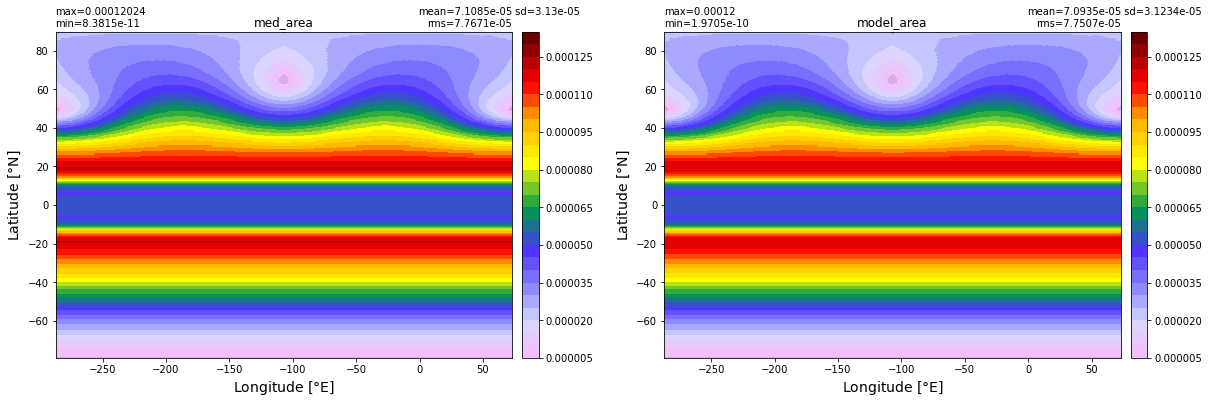

In [15]:
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax1 = ax.flatten()

xyplot(med_area,grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], title='med_area')
xyplot(model_area,grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], title='model_area')


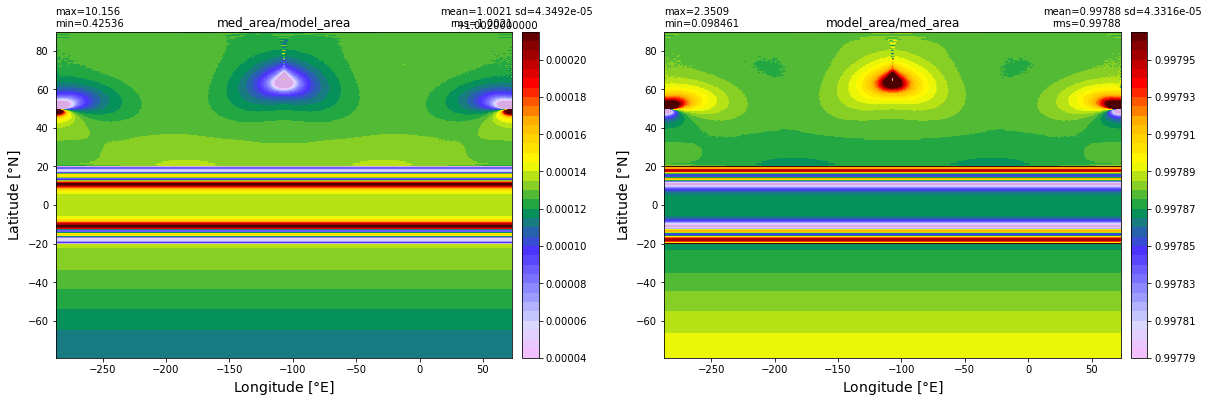

In [16]:
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax1 = ax.flatten()

#med2mod_areacor = np.ma.masked_where(grd.wet==0,med_area/model_area)
#mod2med_areacor = np.ma.masked_where(grd.wet==0,model_area/med_area)

med2mod_areacor = med_area/model_area
mod2med_areacor = model_area/med_area

xyplot(med2mod_areacor,grd.geolon, grd.geolat, area, axis=ax1[0], title='med_area/model_area')
xyplot(mod2med_areacor,grd.geolon, grd.geolat, area, axis=ax1[1], title='model_area/med_area')


### CPL heat budget table (second hour, day 7)

In [17]:
n=1
print(ds_mom.time[n].values)
net_heat_surface = np.nan_to_num(ds_mom.net_heat_surface[n,:].values) * mod2med_areacor
net_heat_coupler1 = np.nan_to_num(ds_mom.net_heat_coupler[n,:].values)* mod2med_areacor
sensible = np.nan_to_num(ds_mom.sensible[n,:].values)* mod2med_areacor
latent = np.nan_to_num(ds_mom.latent[n,:].values)* mod2med_areacor
SW = np.nan_to_num(ds_mom.SW[n,:].values)* mod2med_areacor
LW = np.nan_to_num(ds_mom.LW[n,:].values)* mod2med_areacor
Heat_PmE = np.nan_to_num(ds_mom.Heat_PmE[n,:].values)* mod2med_areacor
seaice_melt_heat = np.nan_to_num(ds_mom.seaice_melt_heat[n,:].values)* mod2med_areacor
net_heat_coupler2 = sensible + latent + SW + LW + seaice_melt_heat
frazil = np.nan_to_num(ds_mom.frazil[n,:].values)* mod2med_areacor
latent_evap= np.nan_to_num(ds_mom.latent_evap[n,:].values)* mod2med_areacor
latent_fprec_diag= np.nan_to_num(ds_mom.latent_fprec_diag[n,:].values)* mod2med_areacor
latent_frunoff= np.nan_to_num(ds_mom.latent_frunoff[n,:].values)* mod2med_areacor




heat_content_lrunoff = np.ma.masked_invalid(ds_mom.heat_content_lrunoff[n,:].values)* mod2med_areacor
heat_content_frunoff = np.ma.masked_invalid(ds_mom.heat_content_frunoff[n,:].values)* mod2med_areacor
heat_content_icemelt = np.ma.masked_invalid(ds_mom.heat_content_icemelt[n,:].values)* mod2med_areacor
heat_content_lprec = np.ma.masked_invalid(ds_mom.heat_content_lprec[n,:].values)* mod2med_areacor
heat_content_fprec = np.ma.masked_invalid(ds_mom.heat_content_fprec[n,:].values)* mod2med_areacor
heat_content_cond = np.ma.masked_invalid(ds_mom.heat_content_cond[n,:].values)* mod2med_areacor
heat_content_massout = np.ma.masked_invalid(ds_mom.heat_content_massout[n,:].values)* mod2med_areacor
heat_content_massin = np.ma.masked_invalid(ds_mom.heat_content_massin[n,:].values)* mod2med_areacor
heat_content_surfwater = np.ma.masked_invalid(ds_mom.heat_content_surfwater[n,:].values)* mod2med_areacor

# mass
evap= np.nan_to_num(ds_mom.evap[n,:].values)* mod2med_areacor * 1.0e6
lprec= np.nan_to_num(ds_mom.lprec[n,:].values)* mod2med_areacor * 1.0e6
fprec = np.ma.masked_invalid(ds_mom.fprec[n,:].values)* mod2med_areacor * 1.0e6
frunoff = np.ma.masked_invalid(ds_mom.frunoff[n,:].values)* mod2med_areacor * 1.0e6
lrunoff = np.ma.masked_invalid(ds_mom.lrunoff[n,:].values)* mod2med_areacor * 1.0e6
seaice_melt = np.ma.masked_invalid(ds_mom.seaice_melt[n,:].values)* mod2med_areacor * 1.0e6
salt_flux = np.ma.masked_invalid(ds_mom.salt_flux[n,:].values)* mod2med_areacor * 1.0e6

0001-01-13 02:00:00


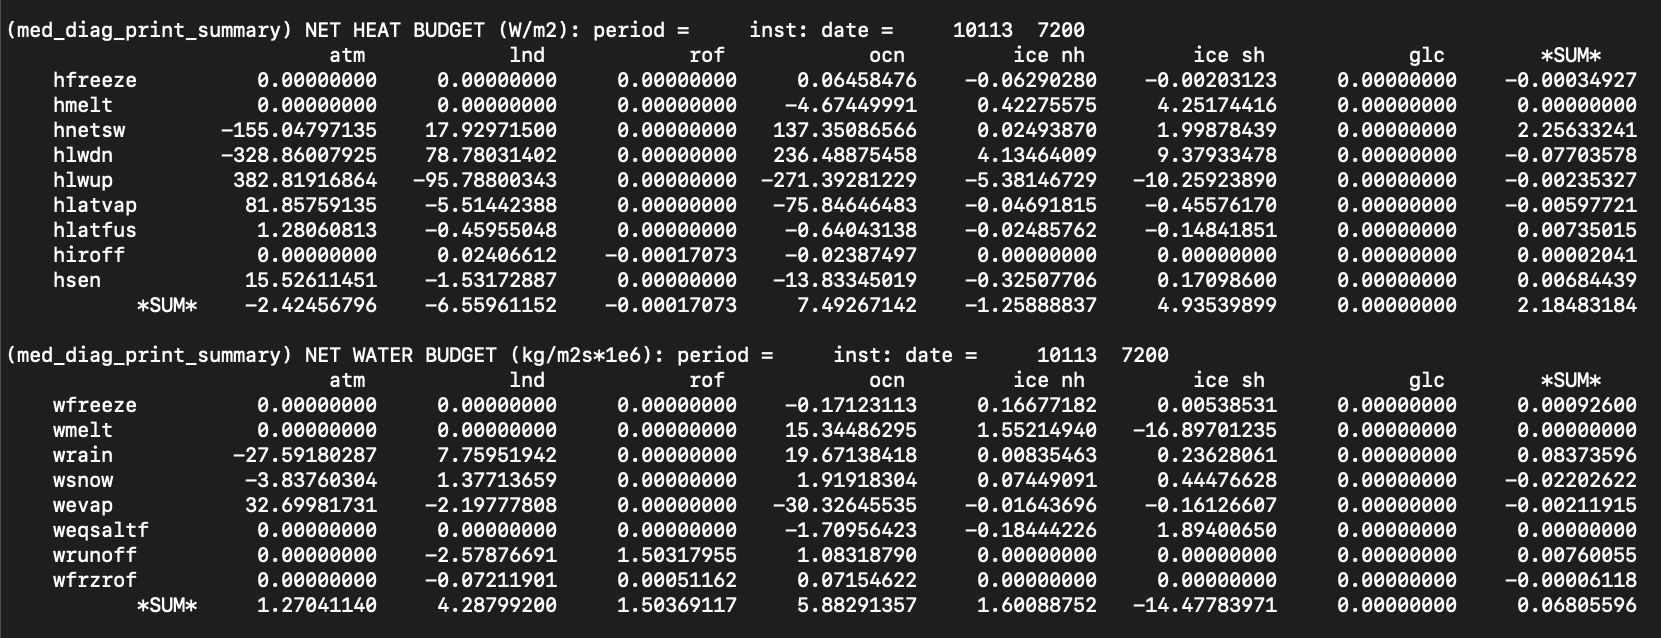

#### Table vs MOM6

In [19]:
heat_table = [0.06458476, -4.67449991, 137.35086566, 
              236.48875458-271.39281229, -75.84646483,
             -0.64043138, -0.02387497, -13.83345019]
heat_table_terms = ['hfreeze','hmelt','SW','LW','LAT_EVAP','LAT_FUS','HIROFF','SEN']
water_table = [-0.17123113, 15.34486295, 19.67138418,
              1.91918304, -30.32645535, -1.70956423, 
              1.08318790, 0.07154622]
water_table_terms = ['wfreeze','wmelt','rain','snow','evap','weqsaltf','wrunoff','wfrzrof']

In [20]:
heat_mom = np.zeros(len(heat_table))
area = 4*np.pi
# frazil or hfreeze
heat_mom[0] = ((frazil*med_area).sum())/area 
# hmelt
heat_mom[1] = ((seaice_melt_heat*med_area).sum())/area 
# SW
heat_mom[2] = ((SW*med_area).sum())/area 
# LW
heat_mom[3] = ((LW*med_area).sum())/area
# latent_evap
heat_mom[4] = ((latent_evap*med_area).sum())/area
# latent_fprec_diag
heat_mom[5] = ((latent_fprec_diag*med_area).sum())/area
# latent_frunoff
heat_mom[6] = ((latent_frunoff*med_area).sum())/area
# sensible
heat_mom[7] = ((sensible*med_area).sum())/area

In [21]:
print('{:>10s} {:>10s} {:>10s} {:>10s}'.format('VARIABLE','MOM6','TABLE','MOM-TABLE'))
print('----------------------------------------------')
for i in range(len(heat_mom)):
    print('{:>10s} {:10.6f} {:10.6f} {:10.6f}'.format(heat_table_terms[i],
        heat_mom[i],heat_table[i],heat_mom[i]-heat_table[i]))
print('----------------------------------------------')
print('{:>10s} {:10.6f} {:10.6f} {:10.6f}'.format('SUM',
        np.sum(heat_mom),np.sum(heat_table),
        np.sum(heat_mom)-np.sum(heat_table)))

  VARIABLE       MOM6      TABLE  MOM-TABLE
----------------------------------------------
   hfreeze   0.064585   0.064585  -0.000000
     hmelt  -4.674500  -4.674500   0.000000
        SW 137.350866 137.350866   0.000000
        LW -34.904058 -34.904058  -0.000000
  LAT_EVAP -75.846465 -75.846465  -0.000000
   LAT_FUS  -0.640431  -0.640431   0.000000
    HIROFF  -0.023875  -0.023875  -0.000000
       SEN -13.833450 -13.833450  -0.000000
----------------------------------------------
       SUM   7.492671   7.492671  -0.000000


In [22]:
water_mom = np.zeros(len(water_table))

#water_table_terms = ['hfreeze','wmelt','rain','snow','evap','weqsaltf','wrunoff','wfrzrof']

# hfreeze
water_mom[0] = 0.0 #((frazil*med_area).sum())/area 
# wmelt
water_mom[1] = ((seaice_melt*med_area).sum())/area 
# rain
water_mom[2] = ((lprec*med_area).sum())/area 
# snow
water_mom[3] = ((fprec*med_area).sum())/area 
# evap
water_mom[4] = ((evap*med_area).sum())/area 
# water equivalent salt flux. Does this apply?
water_mom[5] = 0.0 #((salt_flux*med_area).sum())/area
# lrunoff
water_mom[6] = ((lrunoff*med_area).sum())/area
# frunoff
water_mom[7] = ((frunoff*med_area).sum())/area

In [23]:
print('{:>10s} {:>10s} {:>10s} {:>10s}'.format('VARIABLE','MOM6','TABLE','MOM-TABLE'))
print('----------------------------------------------')
for i in range(len(water_mom)):
    print('{:>10s} {:10.6f} {:10.6f} {:10.6f}'.format(water_table_terms[i],
        water_mom[i],water_table[i],water_mom[i]-water_table[i]))
print('----------------------------------------------')
print('{:>10s} {:10.6f} {:10.6f} {:10.6f}'.format('SUM',
        np.sum(water_mom),np.sum(water_table),
        np.sum(water_mom)-np.sum(water_table)))

  VARIABLE       MOM6      TABLE  MOM-TABLE
----------------------------------------------
   wfreeze   0.000000  -0.171231   0.171231
     wmelt  15.344863  15.344863   0.000000
      rain  19.671384  19.671384  -0.000000
      snow   1.919183   1.919183  -0.000000
      evap -30.326455 -30.326455  -0.000000
  weqsaltf   0.000000  -1.709564   1.709564
   wrunoff   1.083188   1.083188   0.000000
   wfrzrof   0.071546   0.071546  -0.000000
----------------------------------------------
       SUM   7.763709   5.882914   1.880795


#### MOM6 plots

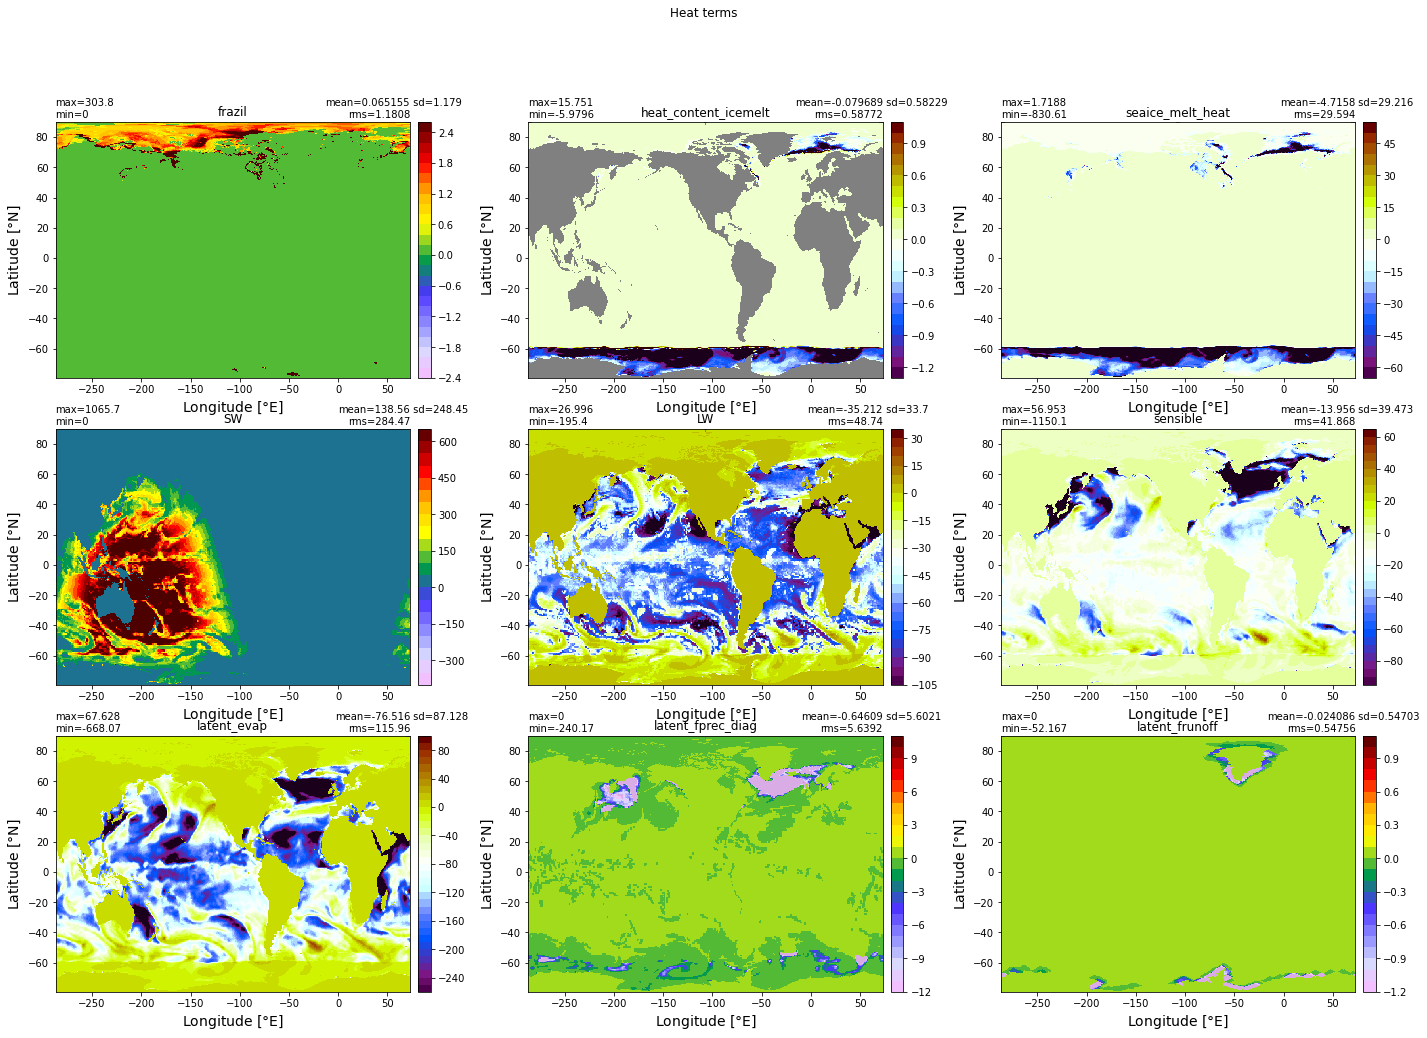

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(24,16))
ax1 = ax.flatten()
plt.suptitle('Heat terms')
xyplot(frazil,grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], title='frazil')
xyplot(heat_content_icemelt,grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], title='heat_content_icemelt')
xyplot(seaice_melt_heat,grd.geolon, grd.geolat, grd.area_t, axis=ax1[2], title='seaice_melt_heat')

xyplot(SW,grd.geolon, grd.geolat, grd.area_t, axis=ax1[3], title='SW')
xyplot(LW,grd.geolon, grd.geolat, grd.area_t, axis=ax1[4], title='LW')
xyplot(sensible,grd.geolon, grd.geolat, grd.area_t, axis=ax1[5], title='sensible')

xyplot(latent_evap,grd.geolon, grd.geolat, grd.area_t, axis=ax1[6], title='latent_evap')
xyplot(latent_fprec_diag,grd.geolon, grd.geolat, grd.area_t, axis=ax1[7], title='latent_fprec_diag')
xyplot(latent_frunoff,grd.geolon, grd.geolat, grd.area_t, axis=ax1[8], title='latent_frunoff')

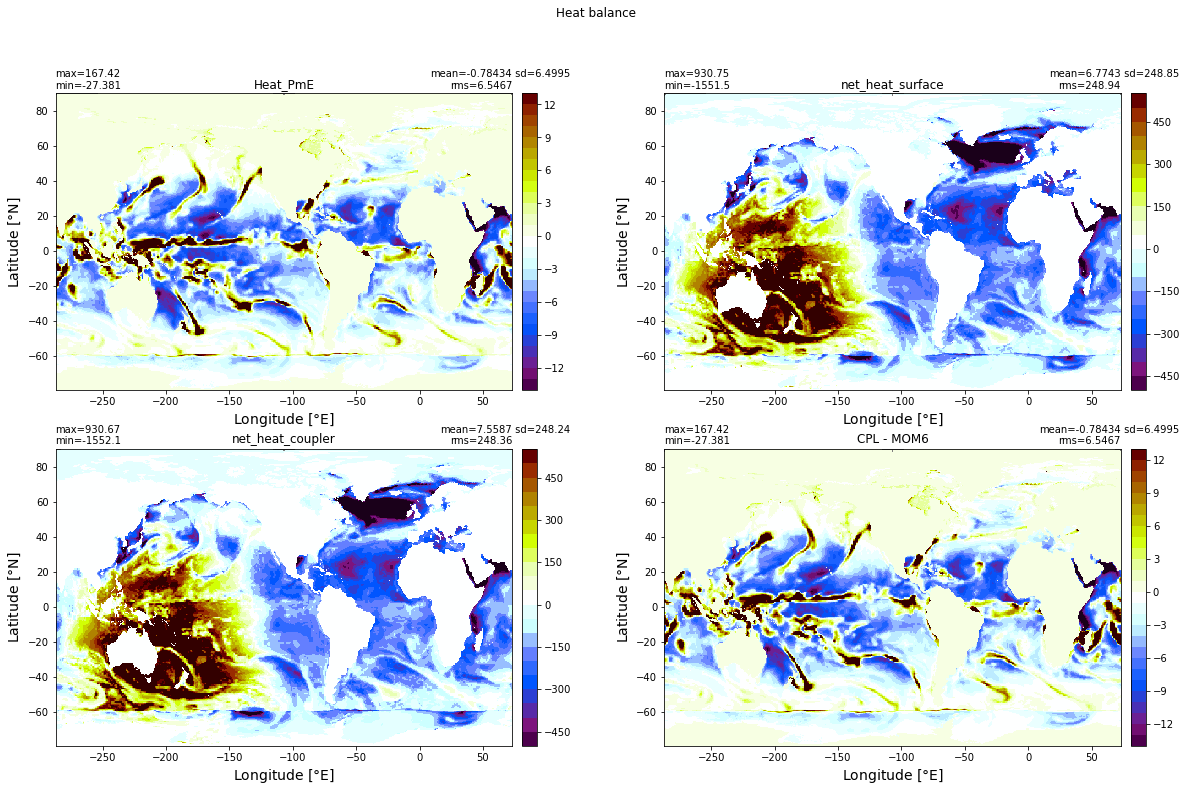

In [25]:
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
ax1 = ax.flatten()
plt.suptitle('Heat balance')

xyplot(Heat_PmE,grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], title='Heat_PmE')
xyplot(net_heat_surface,grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], title='net_heat_surface')
xyplot(net_heat_coupler1+frazil,grd.geolon, grd.geolat, grd.area_t, axis=ax1[2], title='net_heat_coupler')
xyplot(net_heat_surface-(net_heat_coupler1+frazil),grd.geolon, grd.geolat, grd.area_t, axis=ax1[3], title='CPL - MOM6')

#### CPL hist vs MOM6

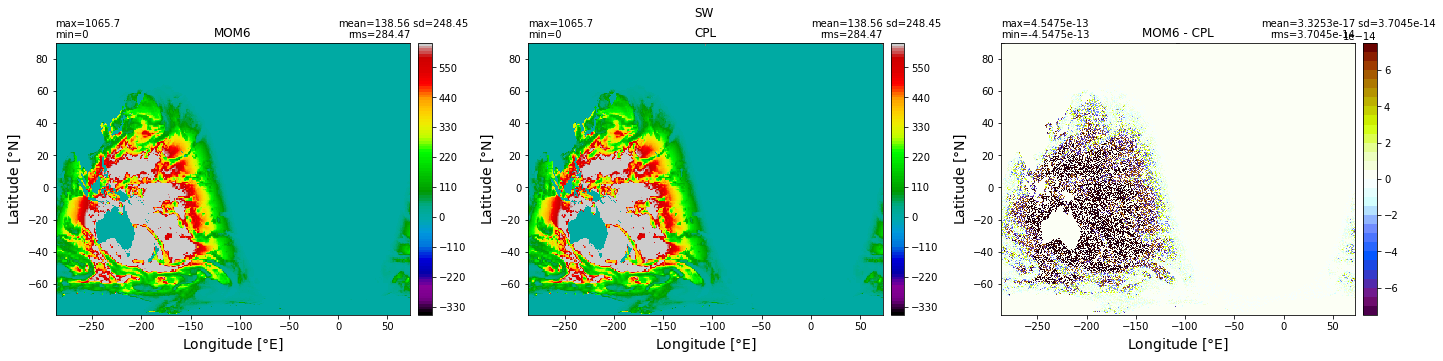

In [26]:
%matplotlib inline
n=n+1
tmp1= np.ma.masked_invalid(ds_cpl.ocnExp_Foxx_swnet_idf[n,:].values) 
tmp2= np.ma.masked_invalid(ds_cpl.ocnExp_Foxx_swnet_idr[n,:].values) 
tmp3= np.ma.masked_invalid(ds_cpl.ocnExp_Foxx_swnet_vdf[n,:].values) 
tmp4= np.ma.masked_invalid(ds_cpl.ocnExp_Foxx_swnet_vdr[n,:].values) 

sw_cpl = tmp1 + tmp2 + tmp3 + tmp4

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('SW')
xyplot(SW, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(sw_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(SW-sw_cpl, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

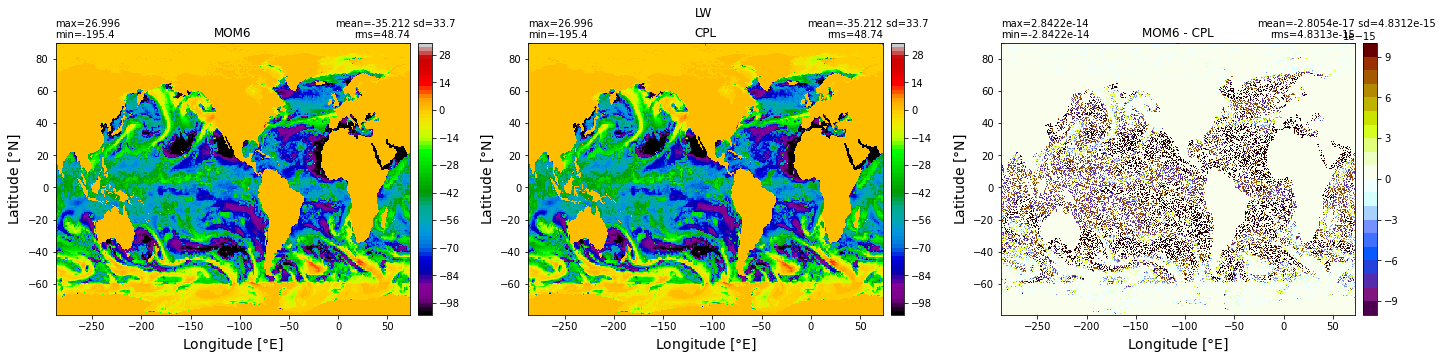

In [27]:
lw_cpl= np.ma.masked_invalid(ds_cpl.ocnExp_Foxx_lwnet[n,:].values) 

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('LW')
xyplot(LW, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(lw_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(LW-lw_cpl, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

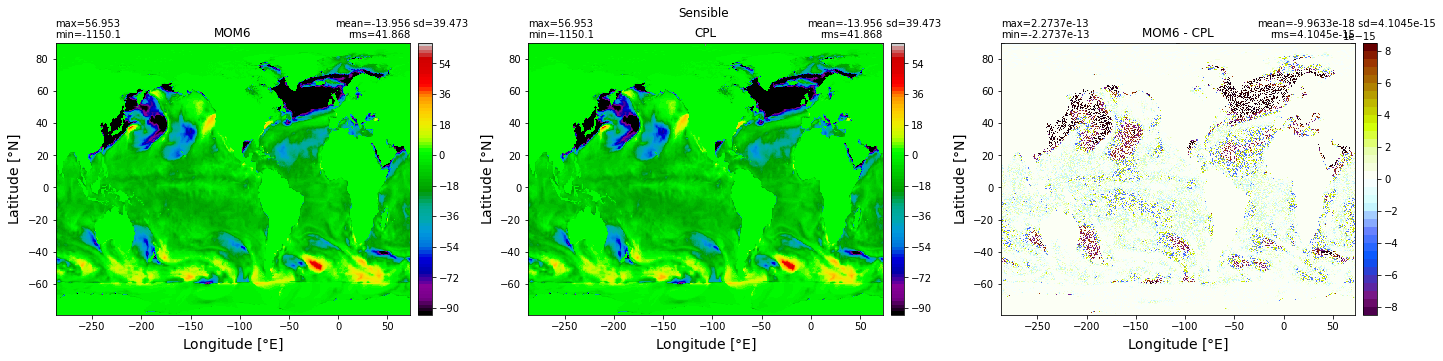

In [28]:
%matplotlib inline

sen_cpl = np.ma.masked_invalid(ds_cpl.ocnExp_Foxx_sen[n,:].values) 

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Sensible')
xyplot(sensible, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(sen_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(sensible - sen_cpl, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

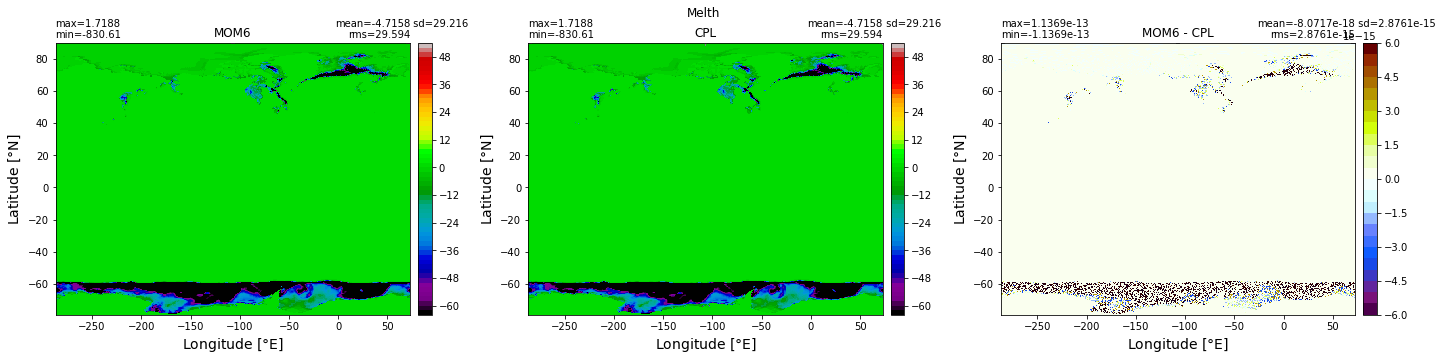

In [29]:
melth_cpl = np.ma.masked_invalid(ds_cpl.ocnExp_Fioi_melth[n,:].values) 

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Melth')
xyplot(seaice_melt_heat, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(melth_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(seaice_melt_heat - melth_cpl, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

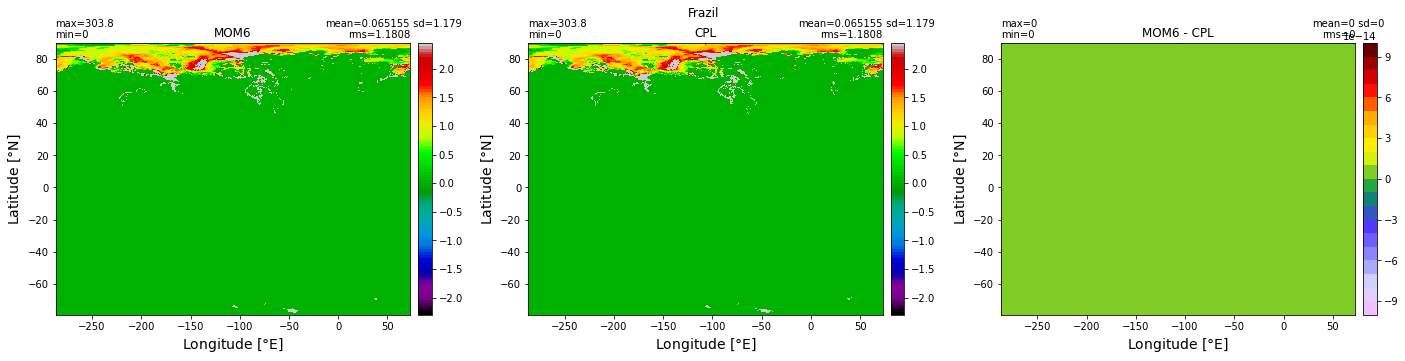

In [30]:
frazil_cpl = np.ma.masked_invalid(ds_cpl.ocnImp_Fioo_q[n,:].values)

frazil_cpl[frazil_cpl<0.] = 0.
    
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Frazil')
xyplot(frazil, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(frazil_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(frazil - frazil_cpl, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

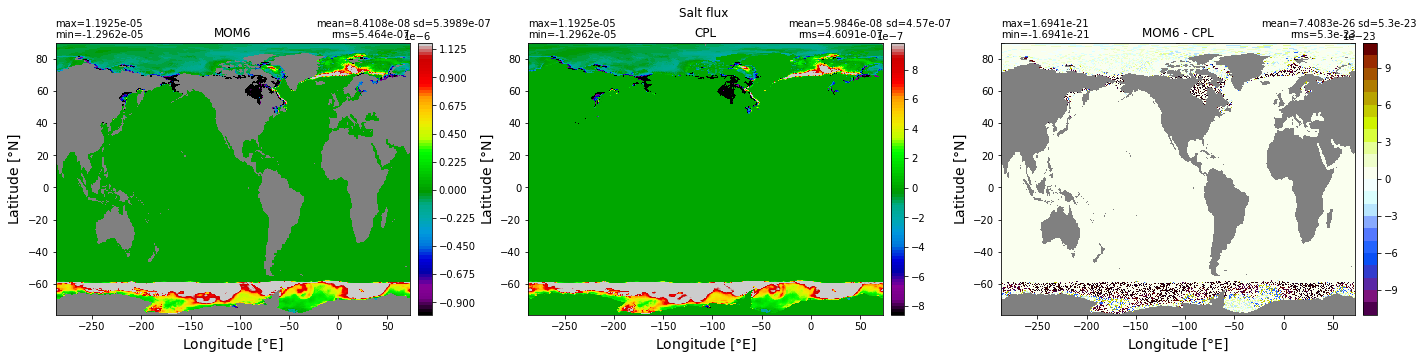

In [41]:
ocnExp_Fioi_salt = np.ma.masked_invalid(ds_cpl.ocnExp_Fioi_salt[n,:].values)
salt_flux_mom = np.ma.masked_invalid(ds_mom.salt_flux[n-1,:].values)* mod2med_areacor

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Salt flux')
xyplot(salt_flux_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(ocnExp_Fioi_salt, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral)
xyplot(salt_flux_mom - ocnExp_Fioi_salt, grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])